# **Streamlining BC Finance’s Home Loan Eligibility Process**
BC Finance Company provides financial services across all home loan categories. Offering services to clients in urban, semi-urban, and rural areas, the organization has many facets. The organization currently uses an **ineffective manual** procedure to validate customers' eligibility. The procedure entails the client submitting an application for a home loan by answering questions and supplying personal information. These responses must then go through a lengthy validation process and this can be a problem for handling multiple applications leading to decreased customer satisfaction, manual errors and **lengthy application times** which could lead to customers seeking other financial institutes to provide financial services for their needs.

The organization is working to create an **automated system** that can accurately determine a customer's eligibility for a home loan in real time in order to address this problem. To ascertain if a customer is eligible for a loan, this system will examine a number of customer variables, including gender, marital status, education, number of dependents, income, loan amount, credit history, and others.

The principal aim is to divide clients into discrete categories according to their loan quantum eligibility. By doing this, BC Finance hopes to **efficiently and successfully target** these consumer segments and provide them with loan products and services that are customized to their unique requirements and preferences. BC Finance hopes to improve client happiness, reduce manual errors, and streamline its lending procedures for long-term profitability and growth by putting in place an automated loan qualifying system.

The steps that need to be taken in order to succesfully create a web application that is fully automated are sectioned into several parts. 
#### These parts include:
    1. Prepare Data
           A. Data Analysis
              i) Dataset Analysis
             ii) Univariate Analysis
            iii) Bi-variate Analysis
    2. Generate Hypotheses
    3. Preprocess Data
        A. Data Cleaning: 
              i) Handling missing values
             ii) Removing duplicates
            iii) Outlier value Handling
    4. Split Dataset
    5. Train Models
    6. Model 1 and Model 2
    7. Predictions and Feature Importance
    8. Web Application

# **1. Prepare Data**

Before any analysis can take place, certain libraries in python need to be imported to perform different functions and make various features available for use.

In [72]:
# Import Libraries
import csv                                              # Read and Write to CSV files
import pandas as pd                                     # Manipulation and analysis of data
import numpy as np                                      # Mathematical operations
import matplotlib.pyplot as plt                         # Matplotlib and Seaborn is used to create visual graphs
import seaborn as sns                                   
from sklearn.model_selection import train_test_split    # Splits the raw_data into two sets of data
import warnings                                         # Ignores any future warnings
warnings.filterwarnings('ignore')

The CSV files named raw_data and validation_data are read so that the unclean data contained in these files can be analyses.

In [73]:
# Read Unclean CSV Files
raw_data = pd.read_csv("raw_data.csv")
raw_data_copy = raw_data.copy()

validation_data = pd.read_csv("validation.csv")
validation_data_copy = validation_data.copy()

## **A. DATA ANALYSIS PROCESSES**
Performing data analysis on unclean data is essential, as it will provide pertinant information regarding the data we are to use. Although, data cleaning is an essential step in the data analysis process, understanding your data before you clean it can make the process more efficient and effective.

***Understanding the Data*** 
It allows you to understand the nature and structure of your data. You can identify the types of variables you have, their distribution, and how they relate to each other.

***Identifying Errors and Anomalies*** 
Unclean data can contain errors, outliers, or anomalies that need to be addressed. By analysing the data first, you can identify these issues and plan how to handle them during the cleaning process.

***Determining Cleaning Strategies*** 
Not all data requires the same cleaning procedures. Analysing the data can help you determine the most appropriate cleaning strategies for your specific dataset.

***Preserving Valuable Information*** 
Sometimes, what might initially appear as an error or outlier could actually be a valuable piece of information. Analysing the data before cleaning ensures that you don’t inadvertently remove these insights.

***Improving Model Accuracy***
Unclean data can lead to inaccurate models. By analysing and cleaning your data, you can improve the accuracy of your subsequent models.

### 1. Dataset Analysis
#### *Dataset Attributes:*
Each attribute in the dataset represents a different variable. Understanding these attributes helps you understand the variables you’re working with, what they represent, and how they might relate to your research question or problem statement.

  - Feature Variable (Independent variables) are variables that stand alone and are not changed by other variables that are being 
    measured. They are denoted as X in ML algorithms.
  - Target Variables (Dependent variables) are the variables that are to be predicted. It is often denoted as Y in ML algorithms.

In [33]:
print(f"Raw Data Columns:\n{raw_data_copy.columns}\n")
print(f"Validation Data Columns:\n{validation_data_copy.columns}\n")

Raw Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_bin', 'Loan_Amount_bin'],
      dtype='object')

Validation Data Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')



##### ***Insight Gained:***
  - In both datasets, the attribute names are written inconsistently. Some attributes have underscores between each word ie. 
    Loan_ID and other attributes use PascalCase i.e ApplicantIncome. This will need to be standardized in the data processing 
    section.
  - For both datasets, there are 12 feature variables but only the "raw_data" dataset has 1 target variable.
  - The target variable in the raw_data dataset is the Loan_Status attribute.
  - This variable will be predicted using models for the "validation_data" dataset.

#### *Dataset Datatypes:*
Attributes can have different data types, such as numerical, categorical, or ordinal. Knowing the data type of each attribute is important because it determines what kind of statistical analysis or data processing is appropriate. Learning the different datatypes for each attribute in both of the datasets will provide insight into the consistance of the datattypes for each specific attribute.

In [75]:
print(f"Raw Dataset Datatypes:\n{raw_data_copy.dtypes}\n")
print(f"Validation Dataset Datatypes:\n{validation_data_copy.dtypes}\n")

Raw Dataset Datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Validation Dataset Datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object



##### ***Insight Gained:***
  - There is a discrepancy between the two datasets: the "Dependents" attribute is of datatype float64 in the "raw_data" dataset 
    but of datatype object is seen in the "validation_data" file.
  - This could lead to potentially issues when modeling, as the model might be expecting the same datatype for a given attribute.
  - This discrepancy will need to be fixed in the data processing section.

#### *Dataset Shape:*
Knowing the number of rows in your datasets provides you with an idea of the volume of the data available to you. More rows mean more data, which can lead to more robust and reliable models. However, it can also mean more computational resources and time required for processing. On the other hand knowing the number of columns in the dataset informs the user on the number of features (or variables) available. Overall the analysis of the shape of the dataset can help in assessing the quality of the data.

For example, if you have many rows but few columns, you might not have enough features to build a good model. Conversely, having a large number of columns compared to rows could lead to overfitting.

In [119]:
print(f"Raw Data Shape: {raw_data_copy.shape}\n")
print(f"Validation Data Shape:{validation_data_copy.shape}")

Raw Data Shape: (614, 13)

Validation Data Shape:(367, 12)


##### ***Insight Gained:***
- Raw Data Shape: 614 rows and 13 columns
- Validation Data Shape: 367 rows and 12 columns
- There is exactly 1 less column in the "validation_data" file which is the target attribute.

### 2. Univariate Analysis
Univariate analysis is the process of analysising individual (one variable) at a time. This is the most basic type of data analysis to  finds patterns in the data.

Analyzing univariate data involves examining the frequency of data in the dataset. In order to do this the count for each category in the attribute is found. Following this the data is normalized to get the proportion of the different categories through the division of the count by the total number of values. Lastly a bar chart is plotted to visualise the data.

#### *Dependent (Target) Attribute:*

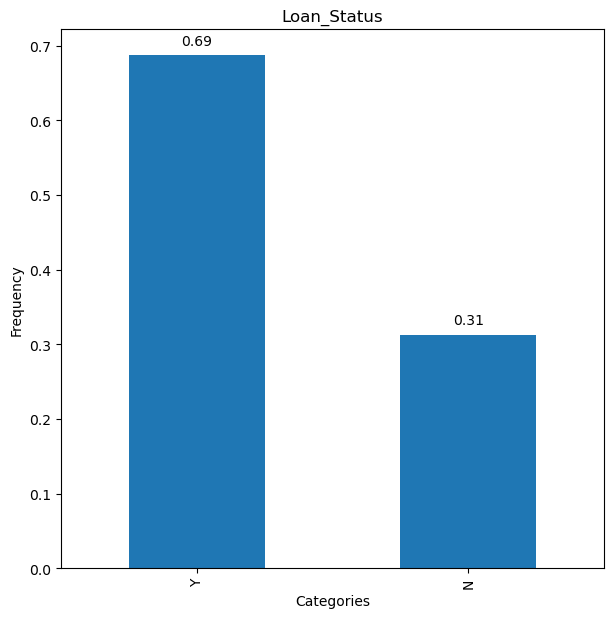

In [12]:
count = raw_data_copy['Loan_Status'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title = 'Loan_Status', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.69 or 69% of the people were approved for a loan (i.e Loan_Status = Yes)
- 0.31 or 31% of the people were not approved for a loan (i.e Loan_Status = No)

#### *Independent Attributes (Categorical):*
Categorical data is a type of data that is qualitative and has no numerical values. It can be divided into categories but cannot be ordered or measured. For examples, 
    
- Colour category can include: red, blue, or green
- Gender category can include: male or female

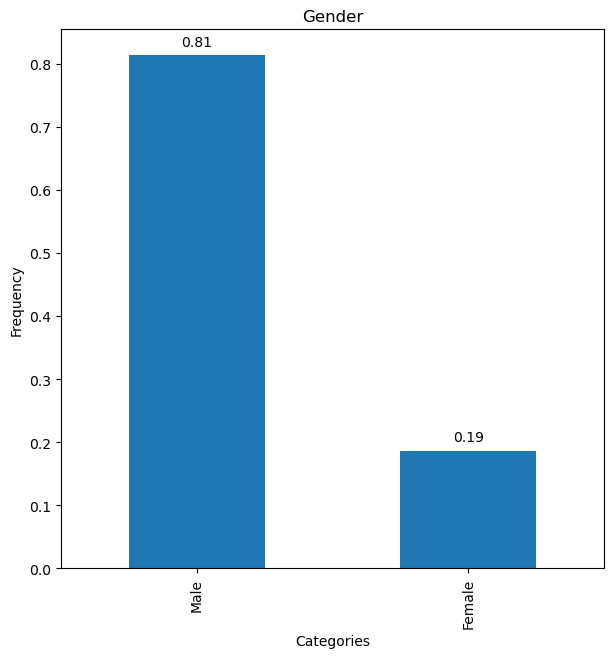

In [13]:
# Gender Attribute
count = raw_data_copy['Gender'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title = 'Gender', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.81 or 81% of the people are male (i.e Gender = Male)
- 0.19 or 19% of the people are female (i.e Gender = Female)

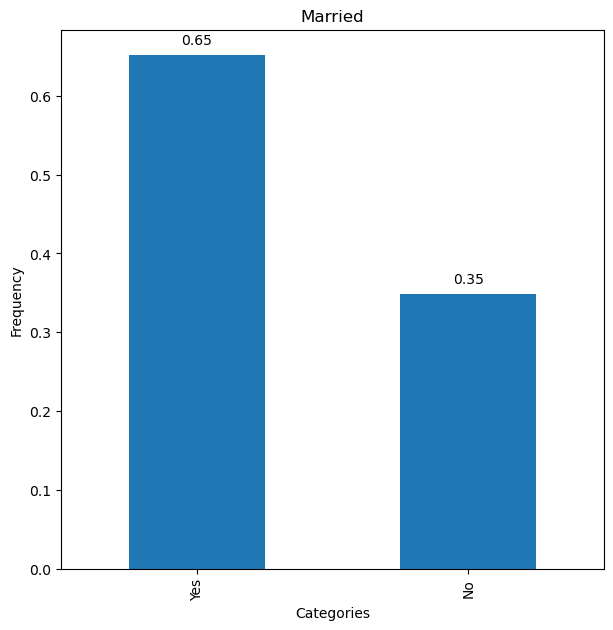

In [14]:
# Married Attribute
count = raw_data_copy['Married'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Married', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.65 or 65% of the people were Married (i.e Married = Yes)
- 0.35 or 35% of the people were not Married (i.e Married = No)

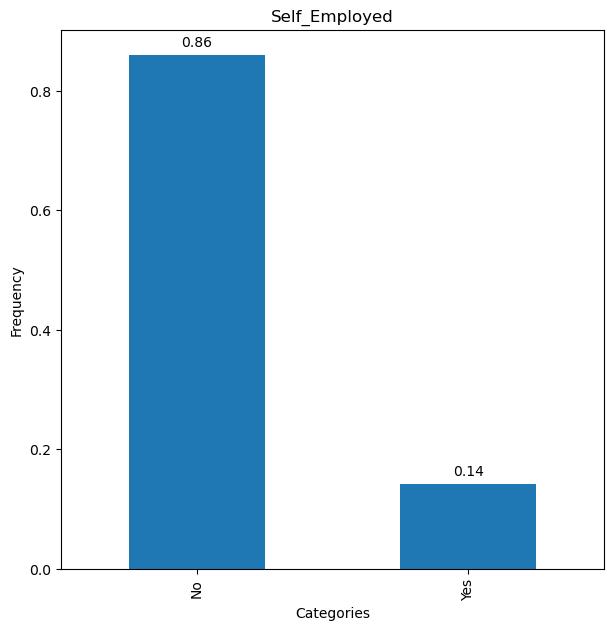

In [15]:
# Self_Employed Attribute
count = raw_data_copy['Self_Employed'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Self_Employed', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.14 or 14% of the people are self-employed (i.e Self_Employed = Yes)
- 0.86 or 86% of the people are not self-employed (i.e Married = No)

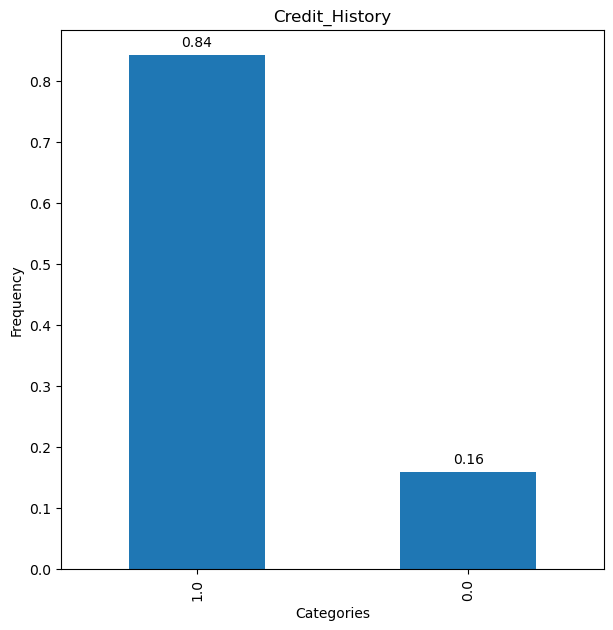

In [16]:
# Credit_History Attribute
count = raw_data_copy['Credit_History'].value_counts(normalize = True)
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Credit_History', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.84 or 84% of the people have a credit history (i.e Credit_History = 1)
- 0.16 or 16% of the people don't have a credit history (i.e Credit_History = 0)

#### *Independent Attributes (Ordinal):*
Ordinal data have a clear ordering or hierarchy in the categories. For example, customer satisfaction ratings can include: unsatisfied, neutral, or satisfied.

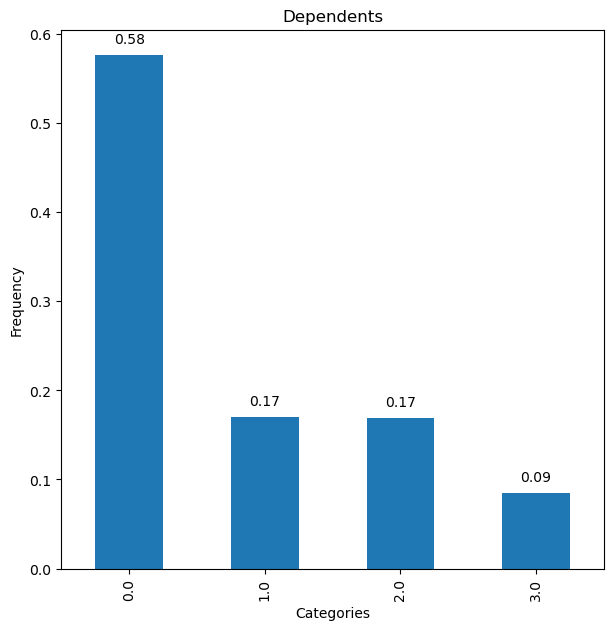

In [17]:
# Dependents Attribute
count = raw_data_copy['Dependents'].value_counts('normalize = True')
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Dependents', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.58 or 58% of the people don't have Dependent (i.e Dependents = 0)
- 0.17 or 17% of the people has only one Dependent (i.e Dependents = 1)
- 0.17 or 17% of the people has two Dependents (i.e Dependents = 2)
- 0.09 or 9% of the people has three or more Dependents (i.e Dependents = 3+)

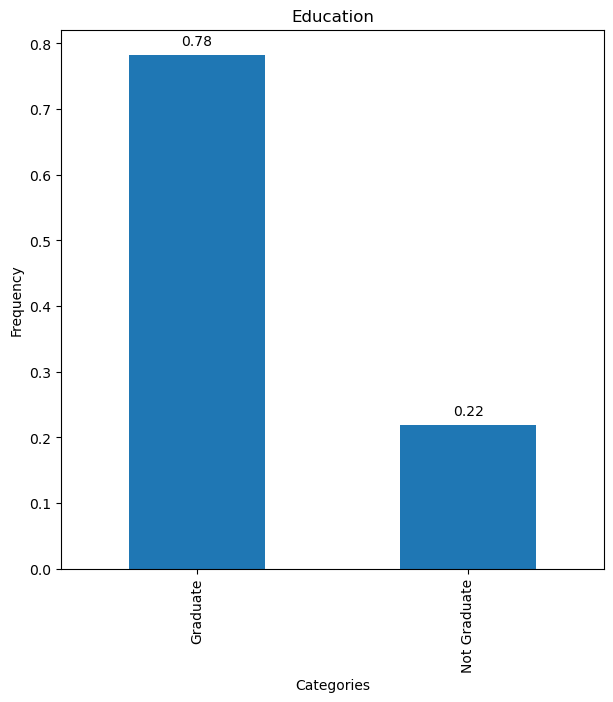

In [18]:
# Education Attribute
count =raw_data_copy['Education'].value_counts('normalize = True')
plt.figure(figsize=(7, 7))
chart = count.plot.bar(title='Education', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.78 or 78% of the people have graduated (i.e Education = Graduate)
- 0.22 or 22% of the people have not graduated (i.e Education = Not Graduate)

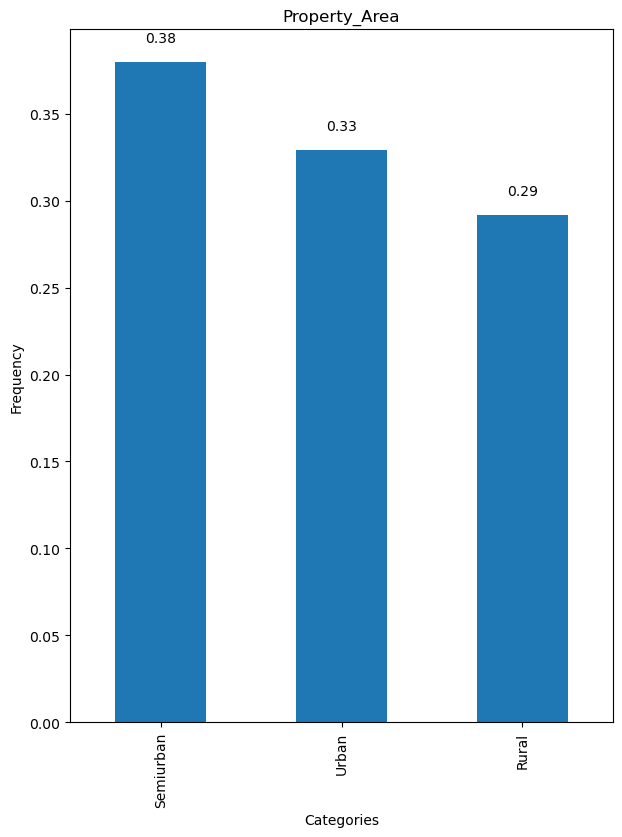

In [19]:
# Property_Area Attribute
count = raw_data_copy['Property_Area'].value_counts('normalize=True')
plt.figure(figsize=(7, 9))
chart = count.plot.bar(title='Property_Area', xlabel = 'Categories', ylabel = 'Frequency')
for i, v in enumerate(count):
    chart.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.show()

##### ***Insight Gained:***
- 0.38 or 38% of the people are located in the semi-urban area (i.e Property_Area = Semiurban)
- 0.33 or 33% of the people are located in the urban area (i.e Property_Area = Urban)
- 0.29 or 29% of the people are located in the rural area(i.e Property_Area = Rural)

#### *Independent Attributes (Nominal)*
Nominal data does not have any kind of order or hierarchy but rather each category are different from each other. For example, the different breeds of dogs (Labrador, Beagle, Poodle) constitute nominal data because there is no inherent order among them.

A distribution chart is used to visualise the distribution of the values in the attributes ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term.

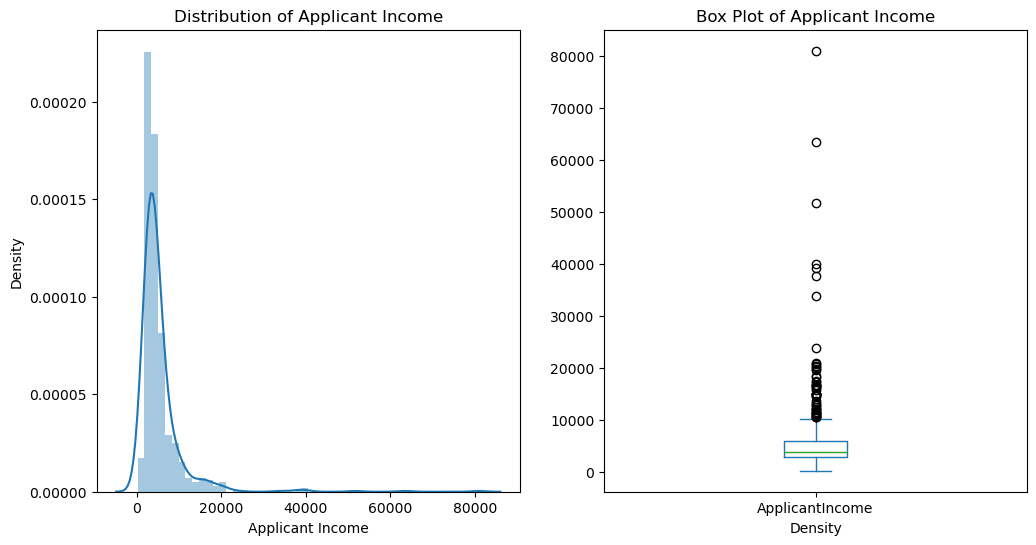

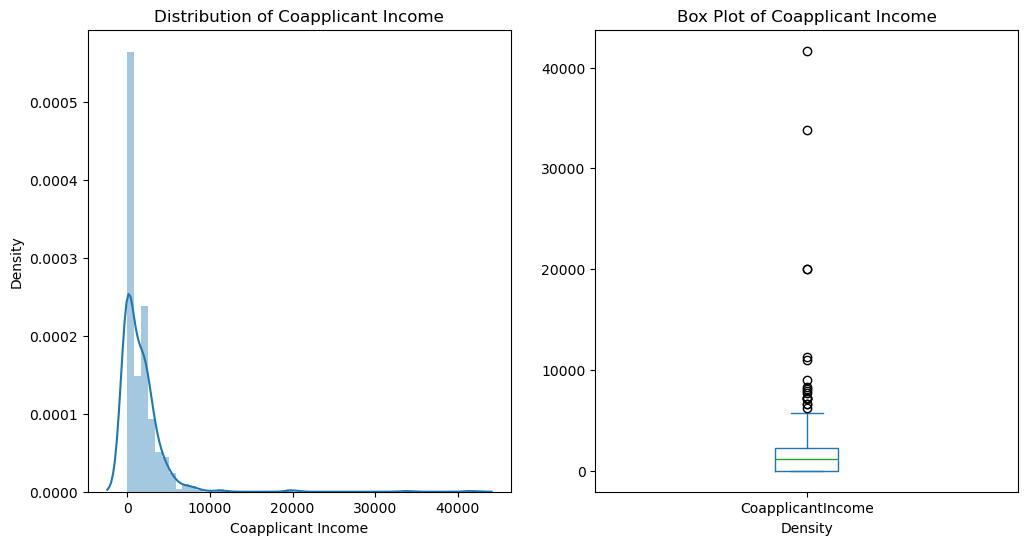

In [123]:
plt.figure(1, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna()  # Drop missing data in the attribute's data
sns.distplot(raw_data_copy['ApplicantIncome'])
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Density')
plt.subplot(122)
boxplot = raw_data_copy['ApplicantIncome'].plot.box()
boxplot.set_title('Box Plot of Applicant Income')
boxplot.set_xlabel('Density')
plt.show()

plt.figure(2, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna()
sns.distplot(raw_data_copy['CoapplicantIncome'])
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Density')
plt.subplot(122)
boxplot = raw_data_copy['CoapplicantIncome'].plot.box()
boxplot.set_title('Box Plot of Coapplicant Income')
boxplot.set_xlabel('Density')
plt.show()

##### ***Insight Gained:***
  - Both the distribution charts of the ApplicantIncome and CoapplicantIncome show a left-skewed distribution that indicates a 
    majority of the applicants have lower incomes.
  - This pattern reflects income inequality within the applicant pool.

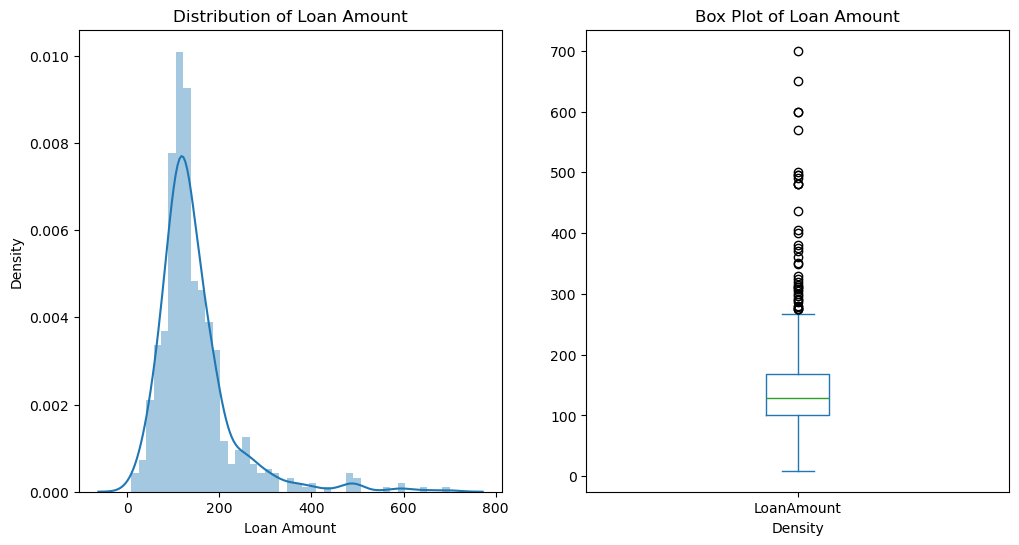

In [124]:
plt.figure(3, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna() 
sns.distplot(raw_data_copy['LoanAmount'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['LoanAmount'].plot.box()
boxplot.set_title('Box Plot of Loan Amount')
boxplot.set_xlabel('Density')
plt.show()

##### ***Insight Gained:***
- Overall the distribution of the data is fairly normal.
- There are outliers in this attribute which could negatively impact the mean and distribution of the data 
- These outliers will be treated in the data cleaning process

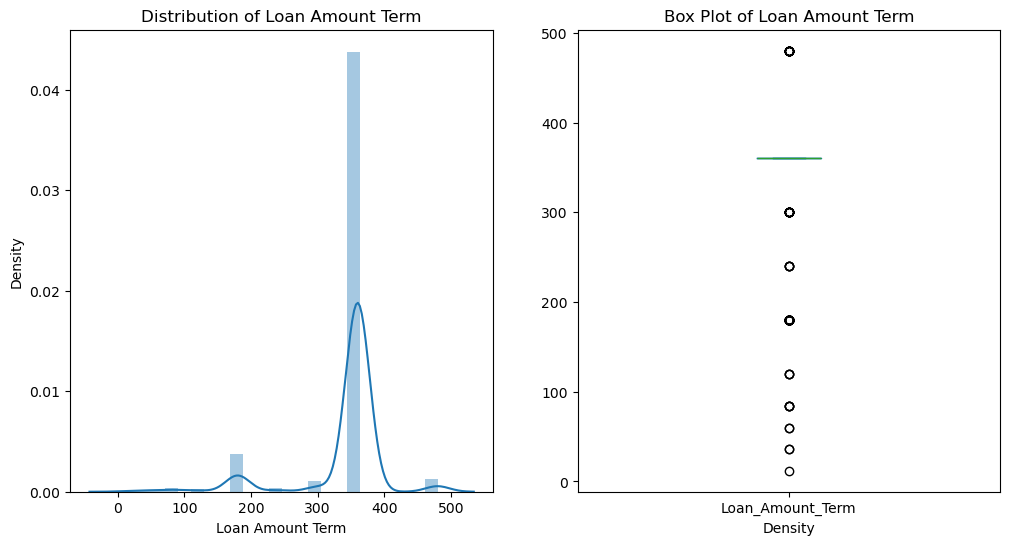

In [125]:
plt.figure(4, figsize=(12, 6))
plt.subplot(121)
raw_data_copy.dropna() 
sns.distplot(raw_data_copy['Loan_Amount_Term'])
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Density')
plt.subplot(122)
boxplot =raw_data_copy['Loan_Amount_Term'].plot.box()
boxplot.set_title('Box Plot of Loan Amount Term')
boxplot.set_xlabel('Density')
plt.show()

##### ***Insight Gained:***
- The peak around 360 indicates a standard loan term.
- Smaller peaks at lower values show that shorter loan terms are less common.

### 3. Bi-variate Analysis

When there are two variables in the data it is called bi-variate analysis. The data is analyzed to find the relationship between the dependent and independent variables. Stacked bar graphs can be utilised to view the correlation between the coefficients.

The graphs created below will display how the Dependent Attribute ‘Loan_Status’ is distributed within each Independent Attribute, regardless of how many observations there are.

#### *Categorical Independent Variables and Dependent Variable LoanAmount:*

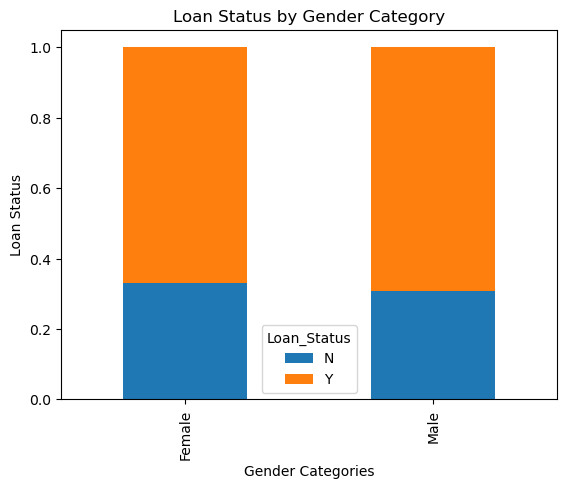

In [31]:
# Loan_Status vs Gender
gender_table = pd.crosstab(raw_data_copy['Gender'], raw_data_copy['Loan_Status'])
gender_table.div(gender_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender Category')
plt.xlabel('Gender Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The proportion of the loan status ‘Yes’ is slightly higher for males, indicating a marginally higher approval rate compared
    to females.
  - For both genders, the majority of the loan status is ‘Yes’, suggesting that most applicants in the dataset were approved for 
    a loan.

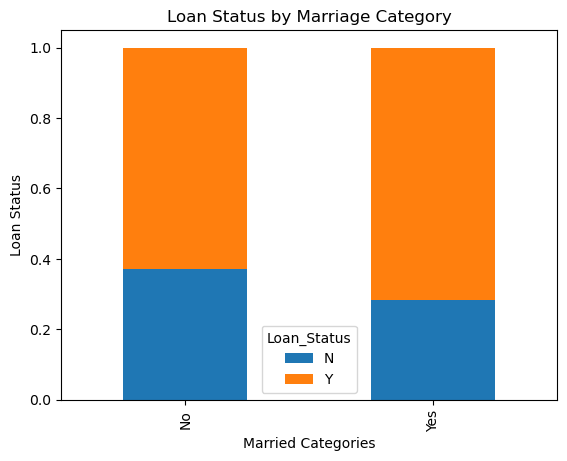

In [32]:
# Loan_Status vs Married
married_table = pd.crosstab(raw_data_copy['Married'], raw_data_copy['Loan_Status'])
married_table.div(married_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Marriage Category')
plt.xlabel('Married Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The ‘Yes’ category shows a higher proportion for the loan status ‘Yes’, suggesting that married individuals may have a better 
    chance of loan approval.
  - Conversely, the ‘No’ category has a higher proportion for the loan status ‘No’, indicating that unmarried individuals may 
    face more rejections.

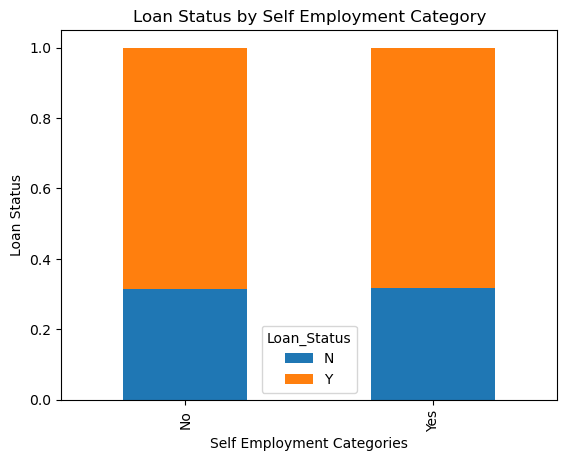

In [22]:
# Loan_Status vs Self_Employed
self_employed_table = pd.crosstab(raw_data_copy['Self_Employed'], raw_data_copy['Loan_Status'])
self_employed_table.div(self_employed_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Self Employment Category')
plt.xlabel('Self Employment Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The ‘Yes’ loan status is present in both self-employment categories, but there is a slightly larger proportion of 
    approvals for individuals who are not self-employed (‘No’) compared to those who are self-employed (‘Yes’).
  - Self-Employment Impact: The graph suggests that being self-employed might have a slight impact on loan approval rates, 
    although the difference is not substantial.

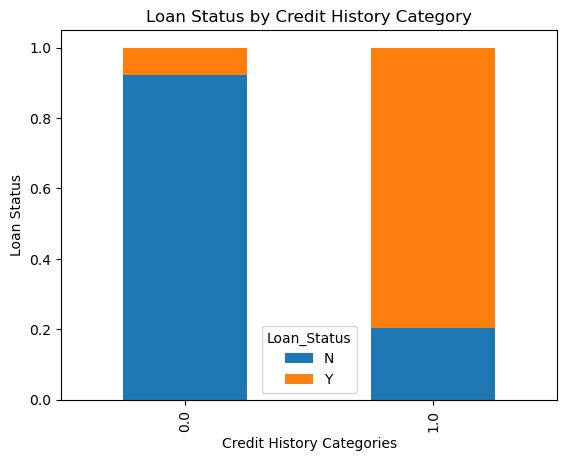

In [23]:
# Loan_Status vs Credit_History
credit_history_table = pd.crosstab(raw_data_copy['Credit_History'], raw_data_copy['Loan_Status'])
credit_history_table.div(credit_history_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Credit History Category')
plt.xlabel('Credit History Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - Individuals in Credit History Category ‘1’ have a higher proportion of getting approval for a loan, indicating a 
    positive correlation between a good credit history and loan approval.
  - Category ‘0’ has a higher proportion of being rejected for a loan approval, suggesting that a poor credit history is 
    associated with higher loan rejections.

#### *Ordinal Independent Variables and Dependent Variable LoanAmount*

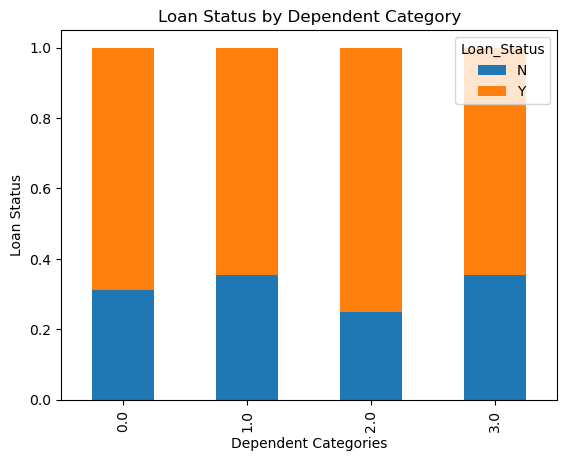

In [24]:
# Loan_Status vs Dependents
dependents_table = pd.crosstab(raw_data_copy['Dependents'], raw_data_copy['Loan_Status'])
dependents_table.div(dependents_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Dependent Category')
plt.xlabel('Dependent Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The ‘Yes’ loan status is present across all dependent categories, but there is a trend where the proportion of 
    approvals decreases as the number of dependents increases.
  - The graph suggests that having more dependents might negatively impact the rate of loan approval.

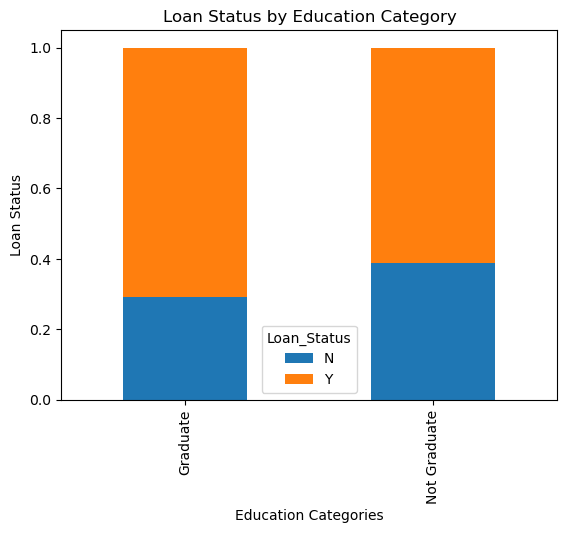

In [25]:
# Loan_Status vs Education
education_table = pd.crosstab(raw_data_copy['Education'], raw_data_copy['Loan_Status'])
education_table.div(education_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Education Category')
plt.xlabel('Education Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - A larger proportion of graduates have their loans approved (‘Y’) compared to non-graduates who have a higher 
    proportion of being rejected (‘N’).

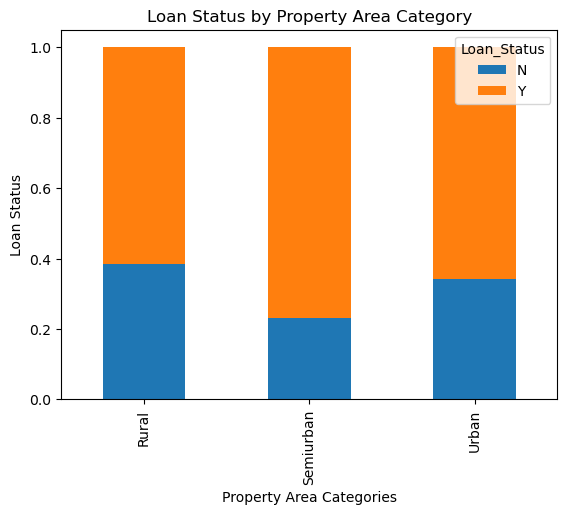

In [26]:
# Loan_Status vs Property Area
property_area_table = pd.crosstab(raw_data_copy['Property_Area'], raw_data_copy['Loan_Status'])
property_area_table.div(property_area_table.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Loan Status by Property Area Category')
plt.xlabel('Property Area Categories')
plt.ylabel('Loan Status')
plt.show()

##### ***Insight Gained:***
  - The Semiurban areas have the highest proportion of approved loans (‘Y’), suggesting a favorable outcome for loan 
    applicants in these areas.
  - The Rural area has the lowest proportion of approved loans, indicating potential challenges or stricter criteria for 
    loan approval.
  - Urban Observations: The Urban area has a moderate proportion of approved loans, falling between the Rural and 
    Semiurban areas.

#### *Numerical Independent Variables and Dependent Variable LoanAmount*
The purpose of this section is to provide insight into how the income levels (both individually and combined with co-applicants) relate to the likelihood of a loan being approved. In order to determine the impact of the income on the Loan_Status, the mean income is calculated to determine who's loans were approved vs who's were not.

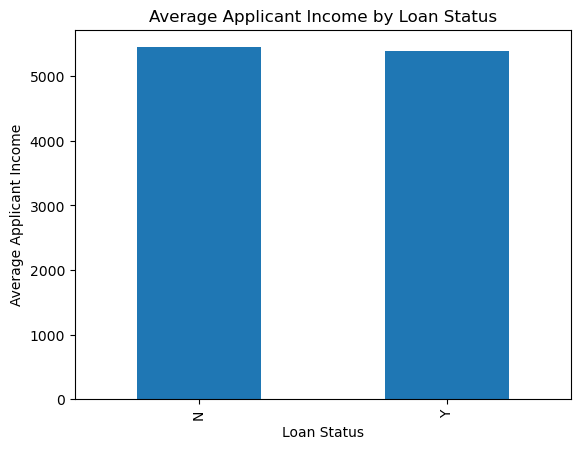

In [27]:
# Loan_Status vs Applicant_Income
raw_data_copy.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.title('Average Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Applicant Income')
plt.show()

ApplicantIncome is categorized in loans within each income bracket. This will access whether different income levels, when the applicant income and the co-applicant income are added together, will influence the Loan approval rate.

Binning will transform the continuous numerical variables into discrete categorical ‘bins’. Income brackets such as "Low", "Average", "Above Average", and "High" are used to provide a qualitative understanding of the ranges in the data.

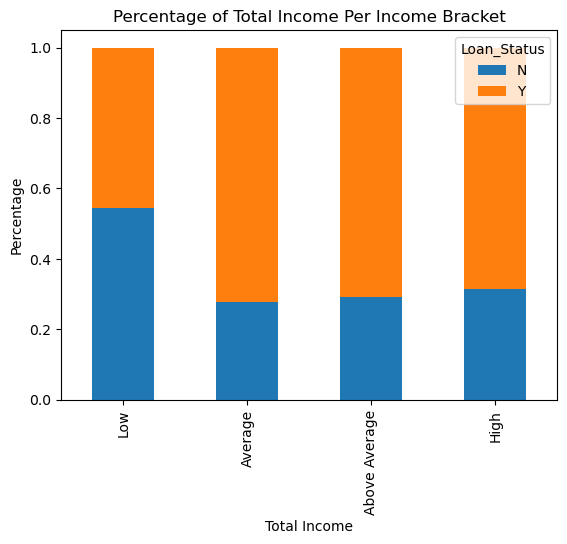

In [28]:
# Loan_Status vs Total Income
# Combine the applicant income and co-applicant income together
raw_data_copy['Total_Income']=raw_data_copy['ApplicantIncome']+raw_data_copy['CoapplicantIncome']

# Calculate the bin values
low = raw_data_copy['ApplicantIncome'].quantile(0.25) # 25th percentile
average = raw_data_copy['ApplicantIncome'].quantile(0.50) # 50th percentile
above_average = raw_data_copy['ApplicantIncome'].quantile(0.75) # 75th percentile
high = 81000

bins = [0, low, average, above_average, high]
group=['Low','Average','Above Average','High']

raw_data_copy['Total_Income_bin']=pd.cut(raw_data_copy['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(raw_data_copy['Total_Income_bin'],raw_data_copy['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Total Income Per Income Bracket')
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

##### ***Insight Gained:***
  - The proportion of loans approved for applicants with low total income is significantly lower than for other income groups.
  - Applicants with average, high, and very high total income have a greater proportion of loan approvals.
  - The chart suggests that total income level may impact the likelihood of loan approval.
  - This analysis indicates that higher income levels are associated with better chances of loan approval, highlighting the 
    importance of income in the loan decision process.

Loan amount is categorized in loans within each loan bracket. This will access whether different loan amounts will influence the Loan approval rate.

Loan brackets such as "Low", "Average", and "High" are used to provide a qualitative understanding of the ranges in the data.

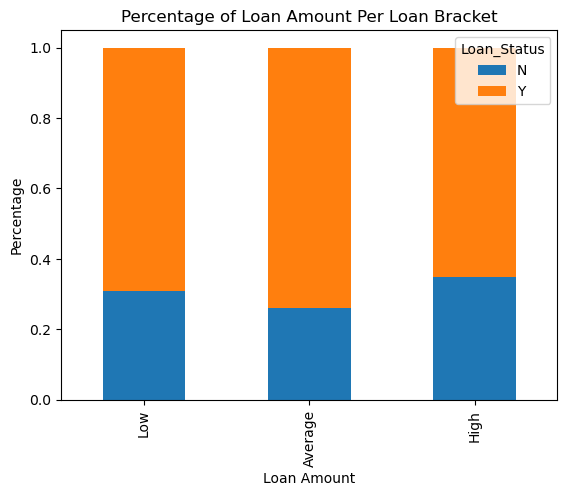

In [29]:
# Loan_Status vs Loan Amount
# Calculate the bin values
low = raw_data_copy['LoanAmount'].quantile(0.333) # 33.3th percentile
average = raw_data_copy['LoanAmount'].quantile(0.666) # 66.6th percentile
high = 700

bins = [0, low, average, high]
group=['Low','Average','High']

raw_data_copy['Loan_Amount_bin']=pd.cut(raw_data_copy['LoanAmount'],bins,labels=group)
Total_Income_bin=pd.crosstab(raw_data_copy['Loan_Amount_bin'],raw_data_copy['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Percentage of Loan Amount Per Loan Bracket')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

##### ***Insight Gained:***
  - Low and Average Loan Amounts: The proportion of approved loans is higher for these categories, indicating a greater 
    likelihood of approval for smaller loan amounts.
  - High Loan Amount: The proportion of approved loans is lower for this category, suggesting that larger loan amounts may have a 
    reduced chance of approval.
  - Therefore it can be said that loans with lower amounts are more likely to be approved.

In [98]:
# Drop all bins created:
raw_data_copy=raw_data_copy.drop(['Loan_Amount_bin','Total_Income_bin','Total_Income'],axis=1)

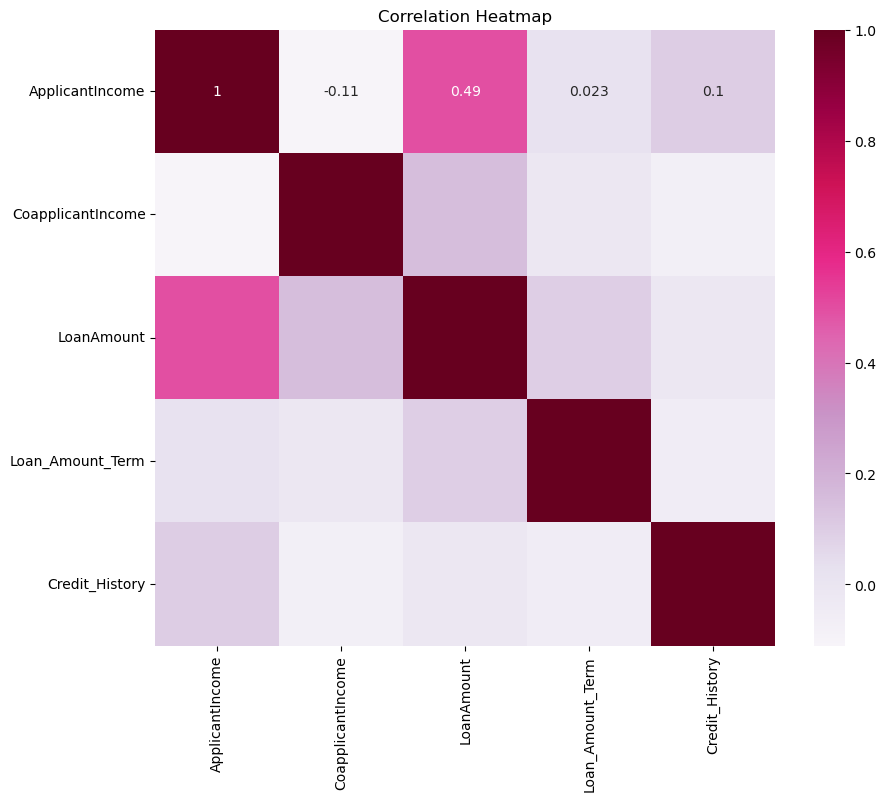

In [99]:
# Using a Heatmap, the numerical attributes in the dataset is viewed to gain insight into the overall 
# comparison through the colour shade variations
numeric_cols = validation_data_copy.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='PuRd')
plt.title('Correlation Heatmap')
plt.show()

##### ***Insight Gained:***

- Moderate Correlation: 
    ApplicantIncome and LoanAmount have a moderate positive correlation, suggesting that as applicant income increases, the 
    loan amount tends to increase as well.

- Credit History Impact: 
    The moderate positive correlation between Credit_History and Loan_Status indicates that applicants with a good credit 
    history are more likely to have their loans approved.

- Coapplicant Contribution: 
    While there is a positive correlation between LoanAmount and CoapplicantIncome, it is relatively weak, implying that co-
    applicant income has a lesser impact on the loan amount compared to the primary applicant’s income.

- Overall, the heatmap suggests that both income and credit history play significant roles in loan amount determination and 
    approval. The weaker correlation for CoapplicantIncome may indicate that lenders prioritize the primary applicant’s financial 
    status.

Having now seen how the different attributes impact the outcome in our datasets, several hypotheses can be drawn from the results.

#### Hypotheses:

The aim of this project is to use machine learning to transform BC Finance's loan approval process. BC Finance seeks to mitigate the inefficiencies linked to manual validation, including longer application periods, higher error rates, and lower customer satisfaction, by automating the real-time eligibility evaluation process. By using this automated approach, BC Finance hopes to improve resource allocation, boost operational efficiency, and ultimately become more competitive in the financial market.

The _'prepare_data.py'_ file is essential in this situation as it organizes several data pretreatment and exploratory analysis activities. By carefully going over the dataset, which includes factors like gender, marital status, income levels, credit history, and property location, this script reveals important information that serves as the foundation for the phases of model construction and hypothesis formulation that follow.

- __Hypothesis 1__: The likelihood of loan approval is positively impacted by having a good credit history. 
    - Justification: Bi-variate analysis shows a moderately positive correlation between Credit_History and Loan_Status, indicating that applicants with a good credit history are more likely to have their loans approved. 

- __Hypothesis 2__: Loan amounts in the low to average range are more likely to be approved 
    than high loan amounts. 
    - Justification: Bi-variate analysis shows that the proportion of approved loans is higher for low and average loan amounts, indicating a greater likelihood of approval for smaller loan amounts. 

- __Hypothesis 3__: An applicant's marital status may have an impact on loan approval rates. 
    - Justification: Bi-variate analysis displays differences in loan approval rates for married individuals compared to unmarried individuals.

- __Hypothesis 4__: The type of property—rural, semi-urban, or urban—may affect the likelihood of a loan being approved. 
    - Justification: variable property areas have variable loan approval rates, as shown by univariate analysis. As an illustration, the percentage of loans that are authorized is higher in semi-urban areas than in urban and rural areas.

- __Hypothesis 5__: There is a positive correlation between income levels and loan acceptance rates. 
    - Justification: According to univariate research, applicants with higher earnings typically receive a higher percentage of loan approvals. This implies that judgments about loan approval may be significantly influenced by an individual's income level. 

## **B. SPLITTING THE RAW DATA INFORMATION**

- Dummy data is used to convert the categorical data into 0's and 1's  to make it easy to be quantified and compared in the future models
    -> Example: Gender has Male and Female categories
    -> Using 'dummies' from pandas, it converts them into Gender_Male = 1 and Gender_Female = 0
- Training data set has weight 80% 0r 0.8
- Testing data set has weight 20% or 0.2
- 'random_state=42' is used for reproducibility, meaning if the code is run multiple times the same train/test split will occur every time.

In [ ]:
# Read Cleaned CSV Files
cleaned_raw_data = pd.read_csv('Data/Cleaned Data/cleaned_raw_data.csv')
cleaned_raw_data_copy = cleaned_raw_data.copy()

# Define the independent variables (features) and the target variable
X = cleaned_raw_data_copy.drop('Loan_Status', axis=1)  # all columns except 'Loan_Status'
y = cleaned_raw_data_copy['Loan_Status']  # only 'Loan_Status' column

# Convert categorical variable in the X dataset(all columns except 'Loan_Status') into dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create new DataFrames for training and testing sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save the training and testing sets to CSV files
train_data.to_csv('Data/Split Data/train_data.csv', index=False)
test_data.to_csv('Data/Split Data/test_data.csv', index=False)